# Cheap Beer Challenge

Having a beer and watching a game with friends we wondered, whether we could tell apart the cheap beers we detest from the cheap beers we deem drinkable. So eight of us took the challenge:

![WTF](data/beer_challenge.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beer_challenge = pd.read_csv('data/beer_challenge.csv', index_col=0, header=[0, 1])

pd.set_option('display.max_columns', None)
beer_challenge

Cheese                                  \
                        Expectation Rating                    Guess   
Anker                             1      1                 Heineken   
Chopfab                           2      2                   Junker   
Corona                            3      3                   Corona   
Feldschlösschen                   1      1                    Anker   
Feldschlösschen Premium           2      1          Feldschlösschen   
Heineken                          1      1                Rugenbräu   
Junker                            2      2                  Chopfab   
Prix Garantie                     2      2              Quöllfrisch   
Quöllfrisch                       3      1            Prix Garantie   
Rugenbräu                         2      2  Feldschlösschen Premium   

                               Geri                                  \
                        Expectation Rating                    Guess   
Anker                             3      1  Feldschlösschen Premium   
Chopfab                           2      2                   Corona   
Corona                            2      1                    Anker   
Feldschlösschen                   1      3                   Junker   
Feldschlösschen Premium           1      2                Rugenbräu   
Heineken                          1      1          Feldschlösschen   
Junker                            3      2              Quöllfrisch   
Prix Garantie                     1      1            Prix Garantie   
Quöllfrisch                       3      1                  Chopfab   
Rugenbräu                         2      1                 Heineken   

                               Lilä                                  \
                        Expectation Rating                    Guess   
Anker                             1      1            Prix Garantie   
Chopfab                           1      2                  Chopfab   
Corona                            2      2  Feldschlösschen Premium   
Feldschlösschen                   2      3              Quöllfrisch   
Feldschlösschen Premium           2      1                    Anker   
Heineken                          2      2          Feldschlösschen   
Junker                            2      3                Rugenbräu   
Prix Garantie                     1      2                 Heineken   
Quöllfrisch                       3      2                   Corona   
Rugenbräu                         3      2                   Junker   

                               Lüku                                  \
                        Expectation Rating                    Guess   
Anker                             2      3  Feldschlösschen Premium   
Chopfab                           3      3                   Copfab   
Corona                            2      2                Rugenbräu   
Feldschlösschen                   3      3                   Junker   
Feldschlösschen Premium           2      1                    Anker   
Heineken                          1      1                   Corona   
Junker                            3      1              Quöllfrisch   
Prix Garantie                     2      2                 Heineken   
Quöllfrisch                       1      1            Prix Garantie   
Rugenbräu                         2      3          Feldschlösschen   

                              Michu                                  \
                        Expectation Rating                    Guess   
Anker                             1      1                 Heineken   
Chopfab                           3      3                  Chopfab   
Corona                            2      2                   Corona   
Feldschlösschen                   1      1            Prix Garantie   
Feldschlösschen Premium           2      2                    Anker   
Heineken                          1      1              Quöllfrisch   
Junker                            3      1  Felds

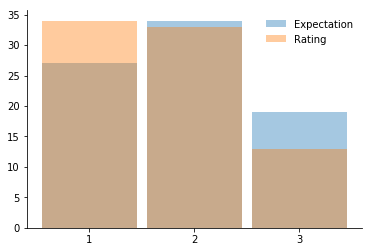

In [3]:
for label in ['Expectation', 'Rating']:
    sns.distplot(beer_challenge.loc[:, (slice(None), label)].values.flatten(), 
                 bins=[0.55, 1.45, 1.55, 2.45, 2.55, 3.45], kde=False, label=label)
plt.legend(frameon=False)
plt.xticks([1, 2, 3])
sns.despine()
plt.show()